Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease.It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world, so with the help of this dataset we will be predicting the hospitalization rate for US which is:-Total number of people hospitalized * 100/ Number of confirmed cases. For this we will be using Linear Regression algorithm

In [5]:
#importing all the libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

EXPLORATORY DATA ANALYSIS

In [7]:
#reading the csv file

In [8]:
df=pd.read_csv('covid19.csv')

In [9]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,5/21/2020 2:32,32.3182,-86.9023,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,5/21/2020 2:32,61.3707,-152.4044,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,5/21/2020 2:32,-14.2710,-170.1320,0,0,NaN,0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,5/21/2020 2:32,33.7298,-111.4312,14906,747,3773.0,10386,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,5/21/2020 2:32,34.9697,-92.3731,5003,107,3852.0,1044,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [10]:
df.shape

(58, 18)

In [11]:
#from the above dataset we will be dropping the columns which has no relevance with prdiction of our taget.

In [12]:
df.drop('Province_State',axis=1,inplace=True)

In [13]:
df.drop('Country_Region',axis=1,inplace=True)

In [14]:
df.drop('Last_Update',axis=1,inplace=True)

In [15]:
df.drop('Lat',axis=1,inplace=True)

In [16]:
df.drop('Long_',axis=1,inplace=True)

In [17]:
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,0,0,NaN,0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,14906,747,3773.0,10386,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,5003,107,3852.0,1044,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [18]:
df.shape

(58, 13)

In [19]:
df.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [20]:
df.dtypes

Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                    int64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Confirmed             58 non-null     int64  
 1   Deaths                58 non-null     int64  
 2   Recovered             42 non-null     float64
 3   Active                58 non-null     int64  
 4   FIPS                  58 non-null     int64  
 5   Incident_Rate         56 non-null     float64
 6   People_Tested         56 non-null     float64
 7   People_Hospitalized   33 non-null     float64
 8   Mortality_Rate        57 non-null     float64
 9   UID                   58 non-null     int64  
 10  ISO3                  58 non-null     object 
 11  Testing_Rate          56 non-null     float64
 12  Hospitalization_Rate  33 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 6.0+ KB


In [22]:
#visualizing null values through heatmap

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

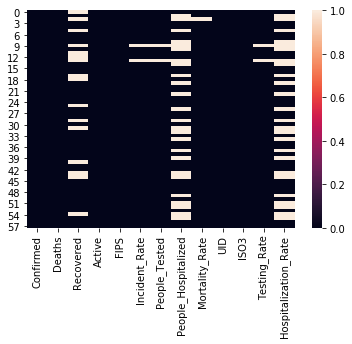

In [24]:
sns.heatmap(df.isnull())

In [25]:
#converting null values to mean of the columns using simple imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')

In [26]:
a=['Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']

In [27]:
for i in a:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,7007.428571,12530,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,401,10,352.000000,39,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,0,0,7007.428571,0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,14906,747,3773.000000,10386,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,5003,107,3852.000000,1044,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


In [29]:
df.info()    #from the below we can now see that no null values are present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Confirmed             58 non-null     int64  
 1   Deaths                58 non-null     int64  
 2   Recovered             58 non-null     float64
 3   Active                58 non-null     int64  
 4   FIPS                  58 non-null     int64  
 5   Incident_Rate         58 non-null     float64
 6   People_Tested         58 non-null     float64
 7   People_Hospitalized   58 non-null     float64
 8   Mortality_Rate        58 non-null     float64
 9   UID                   58 non-null     int64  
 10  ISO3                  58 non-null     object 
 11  Testing_Rate          58 non-null     float64
 12  Hospitalization_Rate  58 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 6.0+ KB


In [30]:
df.dtypes

Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                    int64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [31]:
df.skew()  #to check the skewness in data

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [32]:
#removed skewness by using cuberoot transform and log 1p

In [33]:
df['Confirmed']=np.power(df['Confirmed'],1/3)
df['Confirmed'].skew()

0.889587358287483

In [34]:
df['Deaths']=np.power(df['Deaths'],1/3)
df['Deaths'].skew()

1.3430440413528695

In [35]:
df['Recovered']=np.power(df['Recovered'],1/3)
df['Recovered'].skew()

0.6153215751415806

In [36]:
df['Active']=np.power(df['Active'],1/3)
df['Active'].skew()

0.9385239996338881

In [37]:
df['Incident_Rate']=np.power(df['Incident_Rate'],1/3)
df['Incident_Rate'].skew()

0.23301102043142463

In [38]:
df['FIPS']=np.log1p(df['FIPS'])
df['FIPS'].skew()

3.421539601831991

In [39]:
df['People_Tested']=np.power(df['People_Tested'],1/3)
df['People_Tested'].skew()

0.4529585100865398

In [40]:
df['People_Hospitalized']=np.power(df['People_Hospitalized'],1/3)
df['Recovered'].skew()

0.6153215751415806

In [41]:
df['UID']=np.log(df['UID'])
df['UID'].skew()

-3.113534664703542

In [42]:
df['Testing_Rate']=np.power(df['Testing_Rate'],1/3)
df['Testing_Rate'].skew()

-1.0525854541549968

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Confirmed             58 non-null     float64
 1   Deaths                58 non-null     float64
 2   Recovered             58 non-null     float64
 3   Active                58 non-null     float64
 4   FIPS                  58 non-null     float64
 5   Incident_Rate         58 non-null     float64
 6   People_Tested         58 non-null     float64
 7   People_Hospitalized   58 non-null     float64
 8   Mortality_Rate        58 non-null     float64
 9   UID                   58 non-null     float64
 10  ISO3                  58 non-null     object 
 11  Testing_Rate          58 non-null     float64
 12  Hospitalization_Rate  58 non-null     float64
dtypes: float64(12), object(1)
memory usage: 6.0+ KB


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()
df['ISO3']=le.fit_transform(df['ISO3'])

In [46]:
df.dtypes

Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                     float64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [47]:
df.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,22.978553,8.227908,16.356967,19.478620,3.562062,6.659696,52.288474,14.569780,4.458248,17.157585,3.844828,15.267613,14.342541
std,13.586700,5.773852,7.088518,13.511204,1.695968,2.238458,22.493767,5.973065,2.116191,3.601760,0.720665,2.818879,3.781861
min,0.000000,0.000000,2.351335,0.000000,0.693147,0.000000,4.986631,4.020726,0.000000,2.772589,0.000000,4.605759,6.778043
25%,13.738323,4.198085,10.862517,9.319546,2.957262,5.369681,36.196210,11.330013,3.116158,18.246328,4.000000,13.996267,12.829963
50%,21.628256,7.274437,17.068440,17.792918,3.511434,6.373842,52.330473,16.982051,4.409323,18.246328,4.000000,15.185142,14.342541
75%,30.862185,11.169570,19.136076,26.815247,3.886665,7.734157,64.150285,16.982051,5.450908,18.246328,4.000000,16.657770,15.552021
max,70.765077,30.594084,39.554643,64.138372,11.512925,12.212913,114.619689,42.434270,9.545549,18.247517,5.000000,22.491305,28.054438


In [48]:
#Data Visualization

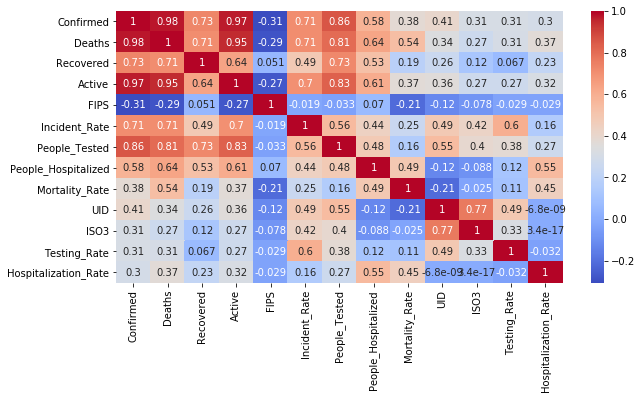

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

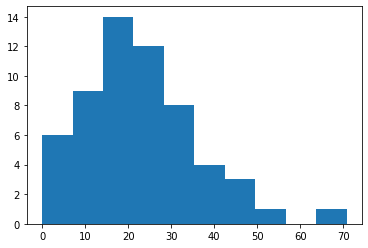

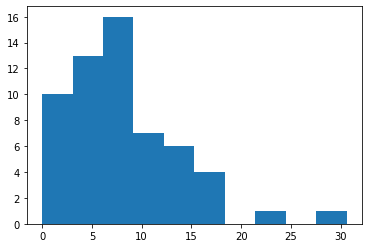

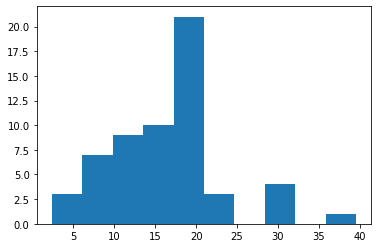

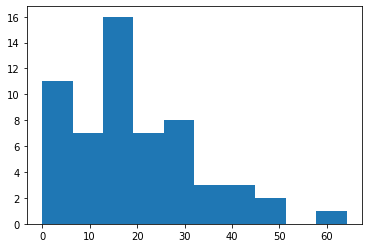

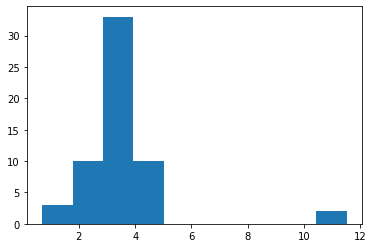

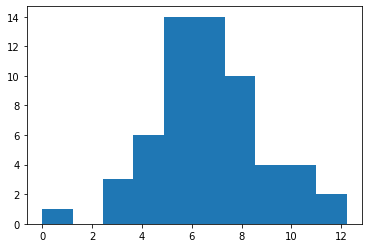

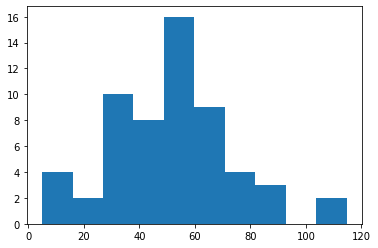

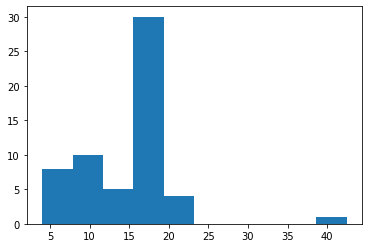

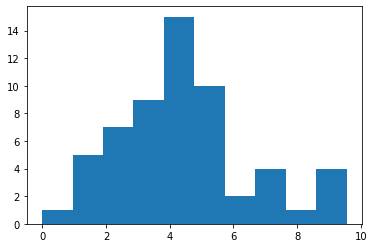

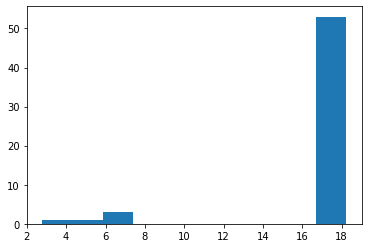

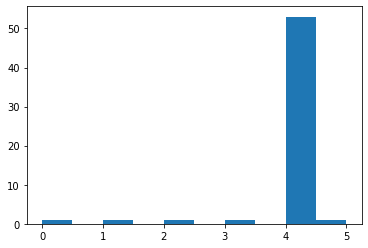

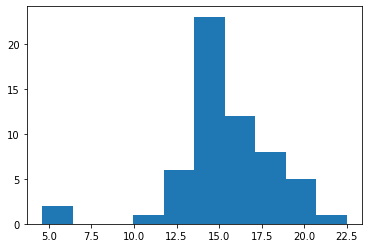

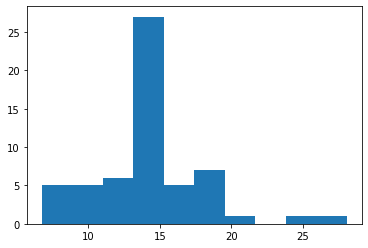

In [50]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

Text(0, 0.5, 'Rate')

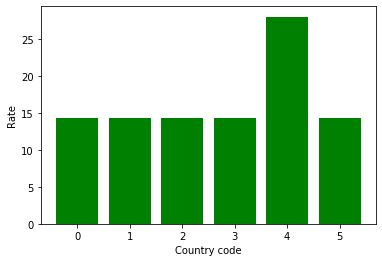

In [51]:
plt.bar(df['ISO3'],df['Hospitalization_Rate'],color='green')
plt.xlabel('Country code')
plt.ylabel('Rate')

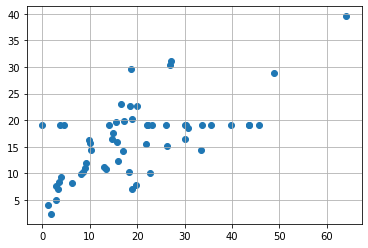

In [52]:
plt.scatter(df['Active'],df['Recovered'])
plt.grid()

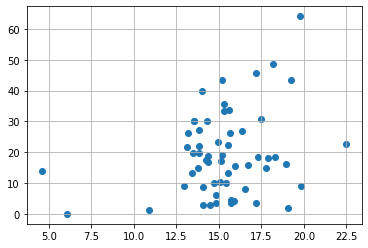

In [53]:
plt.scatter(df['Testing_Rate'],df['Active'])
plt.grid()

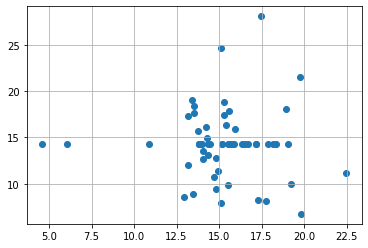

In [54]:
plt.scatter(df['Testing_Rate'],df['Hospitalization_Rate'])
plt.grid()

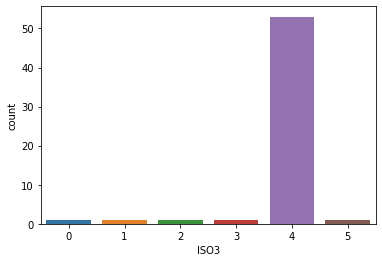

In [55]:
sns.countplot(df['ISO3'])

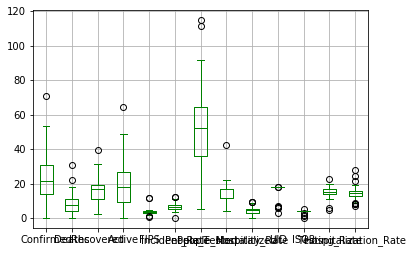

<Figure size 720x1080 with 0 Axes>

In [56]:
df.boxplot(color='green')
plt.figure(figsize=(10,15))
plt.show()

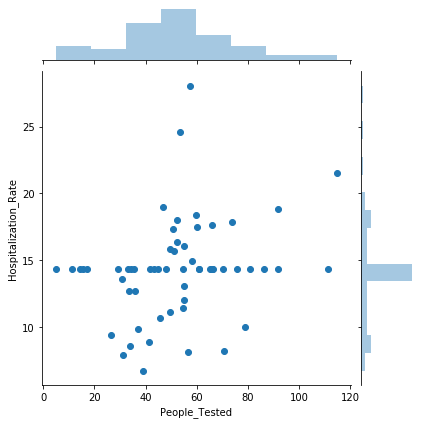

In [57]:
sns.jointplot(df["People_Tested"],df["Hospitalization_Rate"])
plt.show()

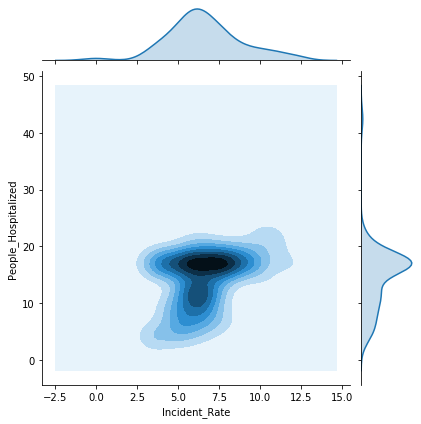

In [58]:
sns.jointplot(df["Incident_Rate"],df["People_Hospitalized"],kind="kde")
plt.show()

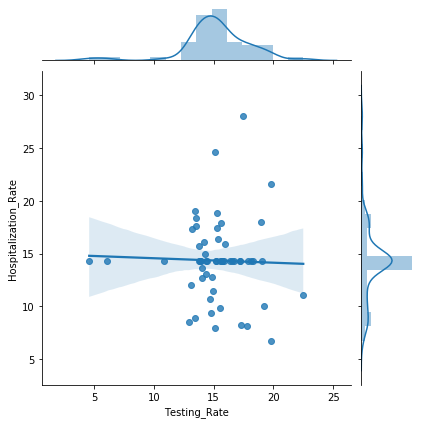

In [59]:
sns.jointplot(df["Testing_Rate"],df["Hospitalization_Rate"],kind="reg")
plt.show()

Above i have visualized the data between various attributes in the dataset to understand the relationship between them,
so from the above what i have concluded is that, there is no linear relationship between any attribute and also outliers is present and data is skewed, so further i will remove the outliers and rescale the data using standardization technique and remove the skewness.

In [60]:
#removing the outliers

In [61]:
from scipy.stats import zscore

In [62]:
z=np.abs(zscore(df))  

In [63]:
threshold=3
print(np.where(z>3))

(array([ 2,  2,  2,  2,  7,  9, 13, 14, 14, 36, 36, 36, 36, 36, 39, 44, 44],
      dtype=int64), array([ 5,  9, 10, 11, 12,  4,  4,  9, 10,  0,  1,  2,  3,  7,  9,  9, 11],
      dtype=int64))


In [64]:
df_new=df[(z<2.5).all(axis=1)]

In [65]:
df_new.shape  #this is the new shape of the data after removing the outliers

(46, 13)

In [66]:
df.shape

(58, 13)

In [67]:
#dividing the dataset in x and target variable(y)

In [68]:
x=df.drop('Hospitalization_Rate',axis=1)

In [69]:
y=df['Hospitalization_Rate'].values
y=y.reshape(-1,1)

In [70]:
x.shape

(58, 12)

In [71]:
y.shape

(58, 1)

In [72]:
#now with the help of linear regression we will build our model

In [73]:
#importing all required libraries

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [75]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: -1.3564410572689933
the r2 score corrosponding to the random state 43 is: -0.5577130067384708
the r2 score corrosponding to the random state 44 is: -0.11146264088233027
the r2 score corrosponding to the random state 45 is: 0.20134689100415426
the r2 score corrosponding to the random state 46 is: -1.904481709769958
the r2 score corrosponding to the random state 47 is: 0.28077891867369154
the r2 score corrosponding to the random state 48 is: 0.21188220646673372
the r2 score corrosponding to the random state 49 is: -0.16485862758641656
the r2 score corrosponding to the random state 50 is: -0.1925639480085488
the r2 score corrosponding to the random state 51 is: -4.682253494915972
the r2 score corrosponding to the random state 52 is: -0.45549493778312145
the r2 score corrosponding to the random state 53 is: 0.31181367843231933
the r2 score corrosponding to the random state 54 is: -3.6110687586560157
the r2 score corrosponding to the ran

In [76]:
lr.coef_

array([[ 0.05999354, -0.26870123, -0.05940435, -0.0224496 ,  0.17163263,
        -0.22980019,  0.01844855,  0.4137224 ,  0.75921039,  0.5997388 ,
        -0.77032276, -0.30903607]])

In [77]:
lr.intercept_

array([4.23844849])

In [78]:
print(mean_absolute_error(y_test,pred))

2.667573984298612


In [79]:
print(mean_squared_error(y_test,pred))

11.461961356292422


In [80]:
#from the above we can conclude that linear regression model fails in terms of its accuracy

In [81]:
#performing regularisation techniques to avoid over and under fitting

In [82]:
from sklearn.linear_model import Lasso,Ridge

In [83]:
ls=Lasso()

In [84]:
rg=Ridge()

In [85]:
#using grid search cv to find the best parameter

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param={'alpha':[0.1,0.01,0.001,1]}

In [88]:
gd=GridSearchCV(estimator=ls,param_grid=param)

In [89]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
gd.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [91]:
gd.best_params_

{'alpha': 1}

In [92]:
gd.best_score_

0.05536526517281628

In [93]:
gd1=GridSearchCV(estimator=rg,param_grid=param)

In [94]:
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
gd1.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [96]:
gd1.best_params_

{'alpha': 1}

In [97]:
gd1.best_score_

-0.006864442796537718

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
score=cross_val_score(lr,x,y,cv=5) # checking the best score with cross valid score

In [100]:
score

array([ 0.15782179,  0.17942173, -1.49066294,  0.55526255,  0.52090215])

In [101]:
#checking the result with other algorithms

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [103]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.30)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.13188765534105695
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 2.640585572950842
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 9.496571025936623
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.057402803440074424
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 2.3826612652563464
SVR(C=1.0, ca

In [105]:
#finding the best parameter for svr using gridsearch cv 

In [106]:
attr={'kernel':('rbf','linear','poly'),'C':[0,1,10]}

In [107]:
gd2=GridSearchCV(estimator=SVR(),param_grid=attr)

In [108]:
gd2.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
gd2.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
gd2.best_params_

{'C': 10, 'kernel': 'rbf'}

In [111]:
gd2.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
gd2.best_score_

0.027202104792061997

In [113]:
#using gridsearchcv to find best parameters for knn

In [114]:
attr={'n_neighbors':[1,3,4,5,6,7,8,9]}

In [115]:
gd3=GridSearchCV(KNeighborsRegressor(),param_grid=attr)

In [116]:
gd3.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
gd3.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [118]:
gd3.best_params_

{'n_neighbors': 7}

In [119]:
gd3.best_score_

0.0012606066088474588

In [132]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor   #boosting the result using ensemble technique

In [121]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [131]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.16605814109066397
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.061476062504632
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.5258984446311485


From the above implementation we can conclude that Adaboost regressor for Decision Tree gives the accuracy of 52%.

In [134]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.46278278512513005
r2 score at lerning rate 0.01 is: 0.3489652967183636
r2 score at lerning rate 1.0 is: 0.5900883382988401


In [135]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.43529380234450454
r2 score at 200 is: 0.4045910954753097
r2 score at 250 is: 0.4133571757401753
r2 score at 300 is: 0.3899372200750425
r2 score at 350 is: 0.4244274584146742


So from the above we came to the conclusion that gradient boost regressor is working well as compared to the other models,with accuracy score of 59% at learning rate of 1.0, so will finalize this model for our prediction.

In [123]:
#so finalizing the model for the prediction

In [144]:
gd=GradientBoostingRegressor(learning_rate=1.0)
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
a1=pd.DataFrame(data=predgd)
a1.to_csv('covid19_gdboost.csv')   # saved the predicted result in csv form
print("r2 score is:",r2_score(y_test,predgd))

r2 score is: 0.6372329126165431


In [128]:
#dumping this model using serialization

In [129]:
from sklearn.externals import joblib

In [145]:
joblib.dump(ad,'covid_gdboost.obj')

['covid_gdboost.obj']